<a href="https://colab.research.google.com/github/Topiado1234/Data-Analysis-Project/blob/main/Human_Activity_Recognition_(HAR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl


In [21]:
import pandas as pd

# Load Excel file
df = pd.read_excel("sensor_data_for_yuvaraj.xlsx")

# View basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [39]:
df.isnull().sum() * 100 / len(df)

,0
tBodyAcc-mean()-X,0.0
tBodyAcc-mean()-Y,0.0
tBodyAcc-mean()-Z,0.0
tBodyAcc-std()-X,0.0
tBodyAcc-std()-Y,0.0
...,...
"angle(X,gravityMean)",0.0
"angle(Y,gravityMean)",0.0
"angle(Z,gravityMean)",0.0
subject,0.0


In [40]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2942,False
2943,False
2944,False
2945,False


In [22]:
features = df.columns[:-2]  # all except 'subject' and 'Activity'
print(f"Total features: {len(features)}")
print(features.tolist())


Total features: 561
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravi

In [23]:
df.dtypes.value_counts()


,count
float64,561
int64,1
object,1


In [24]:
print("Activity distribution:\n", df["Activity"].value_counts())
print("\nSubject distribution:\n", df["subject"].value_counts())


Activity distribution:
 Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

Subject distribution:
 subject
24    381
18    364
20    354
13    327
12    320
4     317
2     302
10    294
9     288
Name: count, dtype: int64


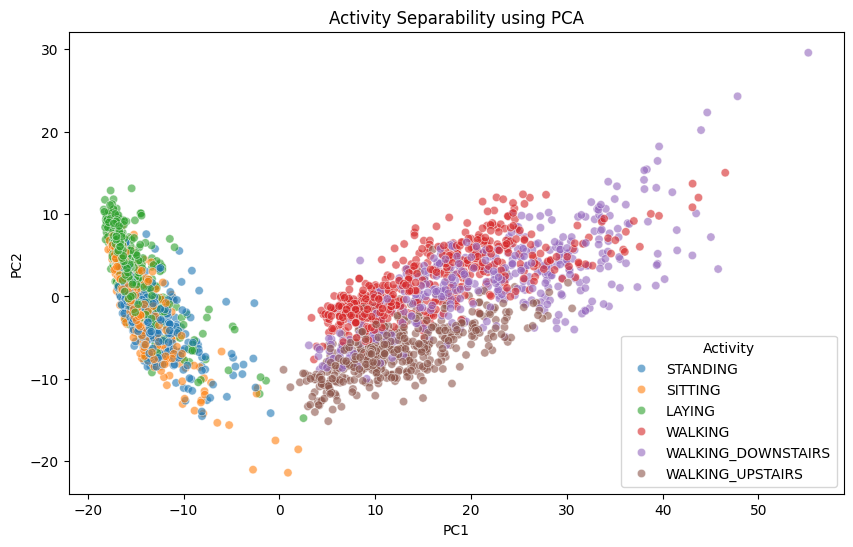

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=["Activity", "subject"])
y = df["Activity"]

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Activity"] = y

plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Activity", alpha=0.6)
plt.title("Activity Separability using PCA")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.99      0.96      0.98       103
          STANDING       0.96      0.99      0.97        96
           WALKING       1.00      0.99      0.99        97
WALKING_DOWNSTAIRS       0.99      0.98      0.98        83
  WALKING_UPSTAIRS       0.98      1.00      0.99       105

          accuracy                           0.99       590
         macro avg       0.99      0.99      0.99       590
      weighted avg       0.99      0.99      0.99       590



In [27]:
from sklearn.metrics import accuracy_score

y_subject = df["subject"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_subject, test_size=0.2, random_state=42)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)

print("Subject classification accuracy:", accuracy_score(y_test2, y_pred2))


Subject classification accuracy: 0.9305084745762712


In [28]:
duration_seconds = len(df)
duration_minutes = duration_seconds / 60

print(f"Approx. duration of dataset: {duration_minutes:.2f} minutes")


Approx. duration of dataset: 49.12 minutes


In [29]:
import numpy as np

importance = clf.feature_importances_
sensor_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
sensor_importance.head(10)


,0
tGravityAcc-max()-Y,0.020144
tGravityAcc-energy()-Y,0.018519
tGravityAcc-mean()-Y,0.018089
"angle(Y,gravityMean)",0.017567
tGravityAcc-min()-Y,0.017348
"angle(Z,gravityMean)",0.016506
tGravityAcc-max()-Z,0.016331
tGravityAcc-mean()-Z,0.014598
tGravityAcc-min()-Z,0.014482
tGravityAcc-sma(),0.013021


In [30]:
staircase_df = df[df["Activity"].isin(["WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"])]
duration_staircase = len(staircase_df) / 60  # in minutes
print(f"Staircase duration: {duration_staircase:.2f} minutes")


Staircase duration: 14.85 minutes


In [31]:
up = df[df["Activity"] == "WALKING_UPSTAIRS"]["subject"].value_counts()
down = df[df["Activity"] == "WALKING_DOWNSTAIRS"]["subject"].value_counts()
ratio = (up / down).dropna()
print("Up/Down ratio per subject:\n", ratio)


Up/Down ratio per subject:
 subject
2     1.021277
4     1.155556
9     1.166667
10    1.236842
12    1.130435
13    1.170213
18    1.054545
20    1.133333
24    1.072727
Name: count, dtype: float64


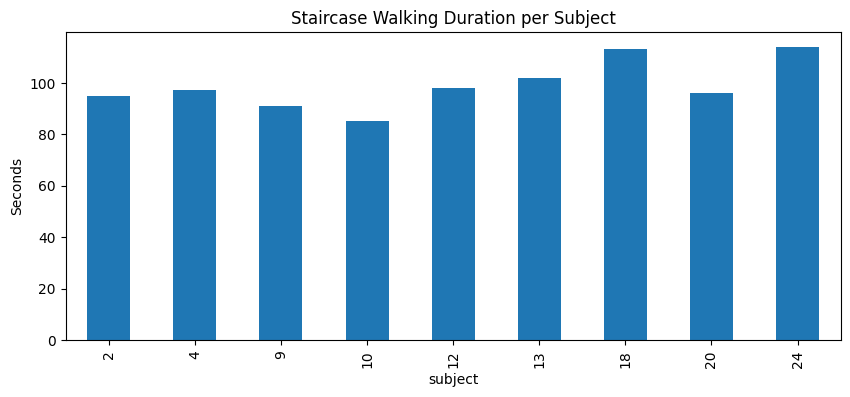

In [32]:
import matplotlib.pyplot as plt

df_stairs = df[df["Activity"].isin(["WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"])]
stairs_per_subject = df_stairs.groupby("subject")["Activity"].count()

plt.figure(figsize=(10, 4))
stairs_per_subject.plot(kind='bar')
plt.title("Staircase Walking Duration per Subject")
plt.ylabel("Seconds")
plt.show()


In [33]:
df_walk = df[df["Activity"] == "WALKING"]
clf.fit(X_scaled, df["subject"])
report = classification_report(df["subject"], clf.predict(X_scaled))
print(report)


              precision    recall  f1-score   support

           2       1.00      1.00      1.00       302
           4       1.00      1.00      1.00       317
           9       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       294
          12       1.00      1.00      1.00       320
          13       1.00      1.00      1.00       327
          18       1.00      1.00      1.00       364
          20       1.00      1.00      1.00       354
          24       1.00      1.00      1.00       381

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [34]:
walk_df = df[df["Activity"] == "WALKING"]
duration_walk = walk_df.groupby("subject").size() / 60
print("Walking duration (minutes) per participant:\n", duration_walk)


Walking duration (minutes) per participant:
 subject
2     0.983333
4     1.000000
9     0.866667
10    0.883333
12    0.833333
13    0.950000
18    0.933333
20    0.850000
24    0.966667
dtype: float64


In [35]:
stair_features = df[df["Activity"].str.contains("STAIRS")]
clf.fit(X_scaled, df["subject"])
predicted = clf.predict(X_scaled)
print(classification_report(df["subject"], predicted))


              precision    recall  f1-score   support

           2       1.00      1.00      1.00       302
           4       1.00      1.00      1.00       317
           9       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       294
          12       1.00      1.00      1.00       320
          13       1.00      1.00      1.00       327
          18       1.00      1.00      1.00       364
          20       1.00      1.00      1.00       354
          24       1.00      1.00      1.00       381

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [36]:
participant_id = 2
walk_data = df[(df["subject"] == participant_id) & (df["Activity"] == "WALKING")]
frequency = walk_data.shape[0]  # assuming 1Hz or 50Hz window
print(f"Participant {participant_id} walking frequency: {frequency}")


Participant 2 walking frequency: 59


In [37]:
up_freq = df[df["Activity"] == "WALKING_UPSTAIRS"].groupby("subject").size()
down_freq = df[df["Activity"] == "WALKING_DOWNSTAIRS"].groupby("subject").size()
print("Upstairs frequency:\n", up_freq)
print("Downstairs frequency:\n", down_freq)


Upstairs frequency:
 subject
2     48
4     52
9     49
10    47
12    52
13    55
18    58
20    51
24    59
dtype: int64
Downstairs frequency:
 subject
2     47
4     45
9     42
10    38
12    46
13    47
18    55
20    45
24    55
dtype: int64


In [38]:
subject_id = 10
subject_data = df[df["subject"] == subject_id]
activity_freq = subject_data["Activity"].value_counts()
print(f"Activity frequencies for Subject {subject_id}:\n", activity_freq)


Activity frequencies for Subject 10:
 Activity
LAYING                58
SITTING               54
WALKING               53
WALKING_UPSTAIRS      47
STANDING              44
WALKING_DOWNSTAIRS    38
Name: count, dtype: int64
